In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import xlwt

xls = pd.ExcelFile('analytics_test.xlsx')
df_sales = pd.read_excel(xls, 'car_sales')
df_details= pd.read_excel(xls, 'car_details')
df_claims= pd.read_excel(xls, 'car_claims')


# Exploratory Data Analysis

In [2]:
print(df_sales.shape)
print(df_details.shape)
print(df_claims.shape)

(70512, 9)
(70512, 10)
(70512, 6)


In [3]:
print(df_sales.dtypes)
print(df_details.dtypes)
print(df_claims.dtypes)

car_id_sales               int64
country                   object
merchant_id              float64
selling_date              object
selling_week              object
payment_date              object
sell_price                 int64
transport_to_merchant      int64
transport_date            object
dtype: object
car_id_details         int64
has_tuning             int64
has_airbags            int64
has_alarm_system       int64
fuel_type              int64
gear_type              int64
ac_type                int64
xenon_light            int64
navigation_system      int64
radio_system         float64
dtype: object
car_id_claims        int64
claim_number        object
full_refunds         int64
partial_refunds      int64
voucher_amount     float64
claim_status        object
dtype: object


In [4]:
print(df_sales.isna().any())
print(df_details.isna().any())
print(df_claims.isna().any())
print('The number of NA merchant IDs is '+str(df_sales['merchant_id'].isna().sum()))
print('The number of NA transport dates is '+str(df_sales['transport_date'].isna().sum()))
print('The number of NA radio system is '+str(df_details['radio_system'].isna().sum()))
print('The number of NA Claim number is '+str(df_claims['claim_number'].isna().sum()))
print('The number of NA voucher amount is '+str(df_claims['voucher_amount'].isna().sum()))
print('The number of NA claim status is '+str(df_claims['claim_status'].isna().sum()))

car_id_sales             False
country                  False
merchant_id               True
selling_date             False
selling_week             False
payment_date             False
sell_price               False
transport_to_merchant    False
transport_date            True
dtype: bool
car_id_details       False
has_tuning           False
has_airbags          False
has_alarm_system     False
fuel_type            False
gear_type            False
ac_type              False
xenon_light          False
navigation_system    False
radio_system          True
dtype: bool
car_id_claims      False
claim_number        True
full_refunds       False
partial_refunds    False
voucher_amount      True
claim_status        True
dtype: bool
The number of NA merchant IDs is 50530
The number of NA transport dates is 37430
The number of NA radio system is 26629
The number of NA Claim number is 50530
The number of NA voucher amount is 55339
The number of NA claim status is 50530


In [5]:
df_sales['merchant_id'][df_sales[df_sales['merchant_id'].isna()].index]=0.0
# We do not care about claim number. We do not care about transport date
df_details['radio_system'][df_details[df_details['radio_system'].isna()].index]=0.0
df_claims['voucher_amount'][df_claims[df_claims['voucher_amount'].isna()].index]=0.0
df_claims['claim_status'][df_claims[df_claims['claim_status'].isna()].index]='Not in File'

C:\Users\Sushree\AppData\Local\Temp/ipykernel_12312/1482032450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales['merchant_id'][df_sales[df_sales['merchant_id'].isna()].index]=0.0
C:\Users\Sushree\AppData\Local\Temp/ipykernel_12312/1482032450.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_details['radio_system'][df_details[df_details['radio_system'].isna()].index]=0.0
C:\Users\Sushree\AppData\Local\Temp/ipykernel_12312/1482032450.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [6]:
# Changing types
df_sales['car_id_sales']=df_sales['car_id_sales'].astype(int).astype(str)
df_sales['merchant_id']=df_sales['merchant_id'].astype(int).astype(str)
df_details['car_id_details']=df_details['car_id_details'].astype(int).astype(str)
df_claims['car_id_claims']=df_claims['car_id_claims'].astype(int).astype(str)

In [7]:
## Now selling week and date, payment date, transport date.
df_sales['selling_date']=pd.to_datetime(df_sales['selling_date'])
df_sales['payment_date']=pd.to_datetime(df_sales['payment_date'])
df_sales['transport_date']=pd.to_datetime(df_sales['transport_date'])

In [8]:
#removing duplicates
df_sales['car_id_sales'][df_sales['car_id_sales'].duplicated()==True]

2484      -597282125
2929       205429969
3195     -1846989462
3434      -601015231
4125      1446318863
            ...     
70245     1791263694
70247    -1822600208
70249    -1976280946
70299     1616742185
70320      397321350
Name: car_id_sales, Length: 961, dtype: object

In [9]:
df_sales[df_sales['car_id_sales']=='-597282125']

,car_id_sales,country,merchant_id,selling_date,selling_week,payment_date,sell_price,transport_to_merchant,transport_date
2087,-597282125,DE,2705371,2021-02-25,2021-08,2021-03-02,750,0,NaT
2484,-597282125,DE,2705371,2021-02-25,2021-08,2021-03-02,750,0,NaT


In [10]:
df_sales.drop_duplicates(inplace=True)
df_details.drop_duplicates(inplace=True)
df_claims.drop_duplicates(inplace=True)

In [11]:
print(df_sales.shape)
print(df_claims.shape)
print(df_details.shape)

(69618, 9)
(70504, 6)
(70034, 10)


In [12]:
print(df_sales.dtypes)
print(df_details.dtypes)
print(df_claims.dtypes)

car_id_sales                     object
country                          object
merchant_id                      object
selling_date             datetime64[ns]
selling_week                     object
payment_date             datetime64[ns]
sell_price                        int64
transport_to_merchant             int64
transport_date           datetime64[ns]
dtype: object
car_id_details        object
has_tuning             int64
has_airbags            int64
has_alarm_system       int64
fuel_type              int64
gear_type              int64
ac_type                int64
xenon_light            int64
navigation_system      int64
radio_system         float64
dtype: object
car_id_claims       object
claim_number        object
full_refunds         int64
partial_refunds      int64
voucher_amount     float64
claim_status        object
dtype: object


In [13]:
df_sales['selling_date'][0].isocalendar()[1]

17

In [14]:
df_dummy = pd.merge(df_sales, df_details, how='inner', left_on = 'car_id_sales', right_on = 'car_id_details')

In [15]:
df_ALL=pd.merge(df_dummy, df_claims, how='inner', left_on = 'car_id_sales', right_on = 'car_id_claims')

In [16]:
df_ALL.shape

(71732, 25)

In [17]:
df_ALL.head(1000)

,car_id_sales,country,merchant_id,selling_date,selling_week,payment_date,sell_price,transport_to_merchant,transport_date,car_id_details,...,ac_type,xenon_light,navigation_system,radio_system,car_id_claims,claim_number,full_refunds,partial_refunds,voucher_amount,claim_status
0,-873191947,ES,0,2021-04-29,2021-17,2021-05-14,1098,1,2021-05-31,-873191947,...,1050,0,0,3534.0,-873191947,NaN,0,0,0.000000,Not in File
1,1021776636,DE,0,2021-08-06,2021-31,2021-08-17,435,1,2021-08-31,1021776636,...,0,0,0,0.0,1021776636,NaN,0,0,0.000000,Not in File
2,1490192135,FR,0,2021-06-03,2021-22,2021-06-08,11028,0,NaT,1490192135,...,1050,0,1100,3534.0,1490192135,NaN,0,0,0.000000,Not in File
3,-1581171421,DE,0,2021-06-07,2021-23,2021-06-08,21100,1,NaT,-1581171421,...,1050,0,1100,3534.0,-1581171421,NaN,0,0,0.000000,Not in File
4,1417558732,DE,0,2021-08-31,2021-35,2021-09-02,1943,1,2021-09-09,1417558732,...,1049,0,0,0.0,1417558732,NaN,0,0,0.000000,Not in File
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,927513318,DE,0,2021-02-23,2021-08,2021-03-02,2250,0,NaT,927513318,...,1049,0,0,0.0,927513318,NaN,0,0,0.000000,Not in File
996,1785656739,IT,7973790,2021-03-29,2021-13,2021-03-30,23562,1,2021-04-20,1785656739,...,1050,0,0,3534.0,1785656739,C1WT75383,1,0,0.000000,CLOSED_NO_COMPENSATION
997,-1513281865,DE,0,2021-04-23,2021-16,2021-05-11,740,1,2021-05-19,-1513281865,...,0,0,0,3534.0,-1513281865,NaN,0,0,0.000000,Not in File
998,-1148940361,DE,8819318,2021-05-21,2021-20,2021-05-25,9852,1,2021-06-14,-1148940361,...,1049,0,0,0.0,-1148940361,C1BX44838,0,1,1671.927368,REJECTED


In [18]:
df_ALL.drop(columns=['car_id_details','car_id_claims','selling_week'],inplace=True)

In [19]:
df_ALL.nunique()

car_id_sales             69551
country                     13
merchant_id               9103
selling_date               243
payment_date               196
sell_price               16792
transport_to_merchant        2
transport_date             212
has_tuning                   2
has_airbags                  2
has_alarm_system             2
fuel_type                    3
gear_type                    3
ac_type                      3
xenon_light                  2
navigation_system            2
radio_system                 6
claim_number             19021
full_refunds                 2
partial_refunds              2
voucher_amount           15146
claim_status                29
dtype: int64

In [20]:
print(df_ALL['country'].unique())
print(df_ALL['fuel_type'].unique())
print(df_ALL['gear_type'].unique())
print(df_ALL['ac_type'].unique())
print(df_ALL['claim_status'].unique())

['ES' 'DE' 'FR' 'IT' 'BE' 'SE' 'PT' 'AT' 'NL' 'PL' 'DK' 'FI' 'LU']
[1039 1040    0]
[1138 1141 1139]
[1050    0 1049]
['Not in File' 'CLOSED_FULLY_PROCESSED' 'REJECTED'
 'CLOSED_NO_COMPENSATION' 'CLOSED_WAITING_FOR_MERCHANT_BANK_DETAILS'
 'MORE_PROOF_RECEIVED' 'WAITING_FOR_LOCAL_OPS_MD_DECISION' 'CREATED'
 'CLOSED_WAITING_FOR_MORE_PROOF' 'CLOSED_ITEMS_FOUND_AND_SENT'
 'CLOSED_CARRIER_WILL_COMPENSATE'
 'WAITING_FOR_SALES_TO_NEGOTIATE_WITH_THE_MERCHANT' 'PROOF_NOT_RECEIVED'
 '2ND_DECISION_WAITING_FOR_SALES_TO_NEGOTIATE_WITH_MERCHANT'
 'MISSING_ITEMS_IN_PROGRESS' 'WAITING_FOR_CLAIMS_TEAM_1_EVALUATION' 'NEW'
 'WAITING_FOR_CLAIMS_TEAM_2_EVALUATION' 'CLOSED_OVER_TIME_LIMIT'
 '2ND_DECISION_WAITING_FOR_LOCAL_OPS_MD_DECISION'
 'CLOSED_WAITING_FOR_DOCUMENTS'
 'CLOSED_WAITING_FOR_MONEY_TO_BE_SHIPPED_AND_COMPENSATION_TO_BE_RECORDED'
 'CLOSED_WAITING_FOR_CAR_DOCUMENTS_AND_BANK_DETAILS'
 'NEW_MISSING_ITEM_CLAIM' 'WAITING_FOR_CARRIER_FEEDBACK'
 'WAITING_FOR_LEGAL_TEAM' '2ND_EVALUATION_CLAIMS_TEAM_2'


## Conclusion: During Data wrangling, the following was carried out
####    1- The duplicated entries in each of the datasets are removed
####    2- The columns are converted to suitable data types
####    3- NAN data is changed to be able to represent them in calculations.
####    4- Unnecessary columns are dropped.
####    5- The 3 datasets are converted to 1 dataset.

### Some exploration:


### Understanding and visualizing the correlations amongst the features

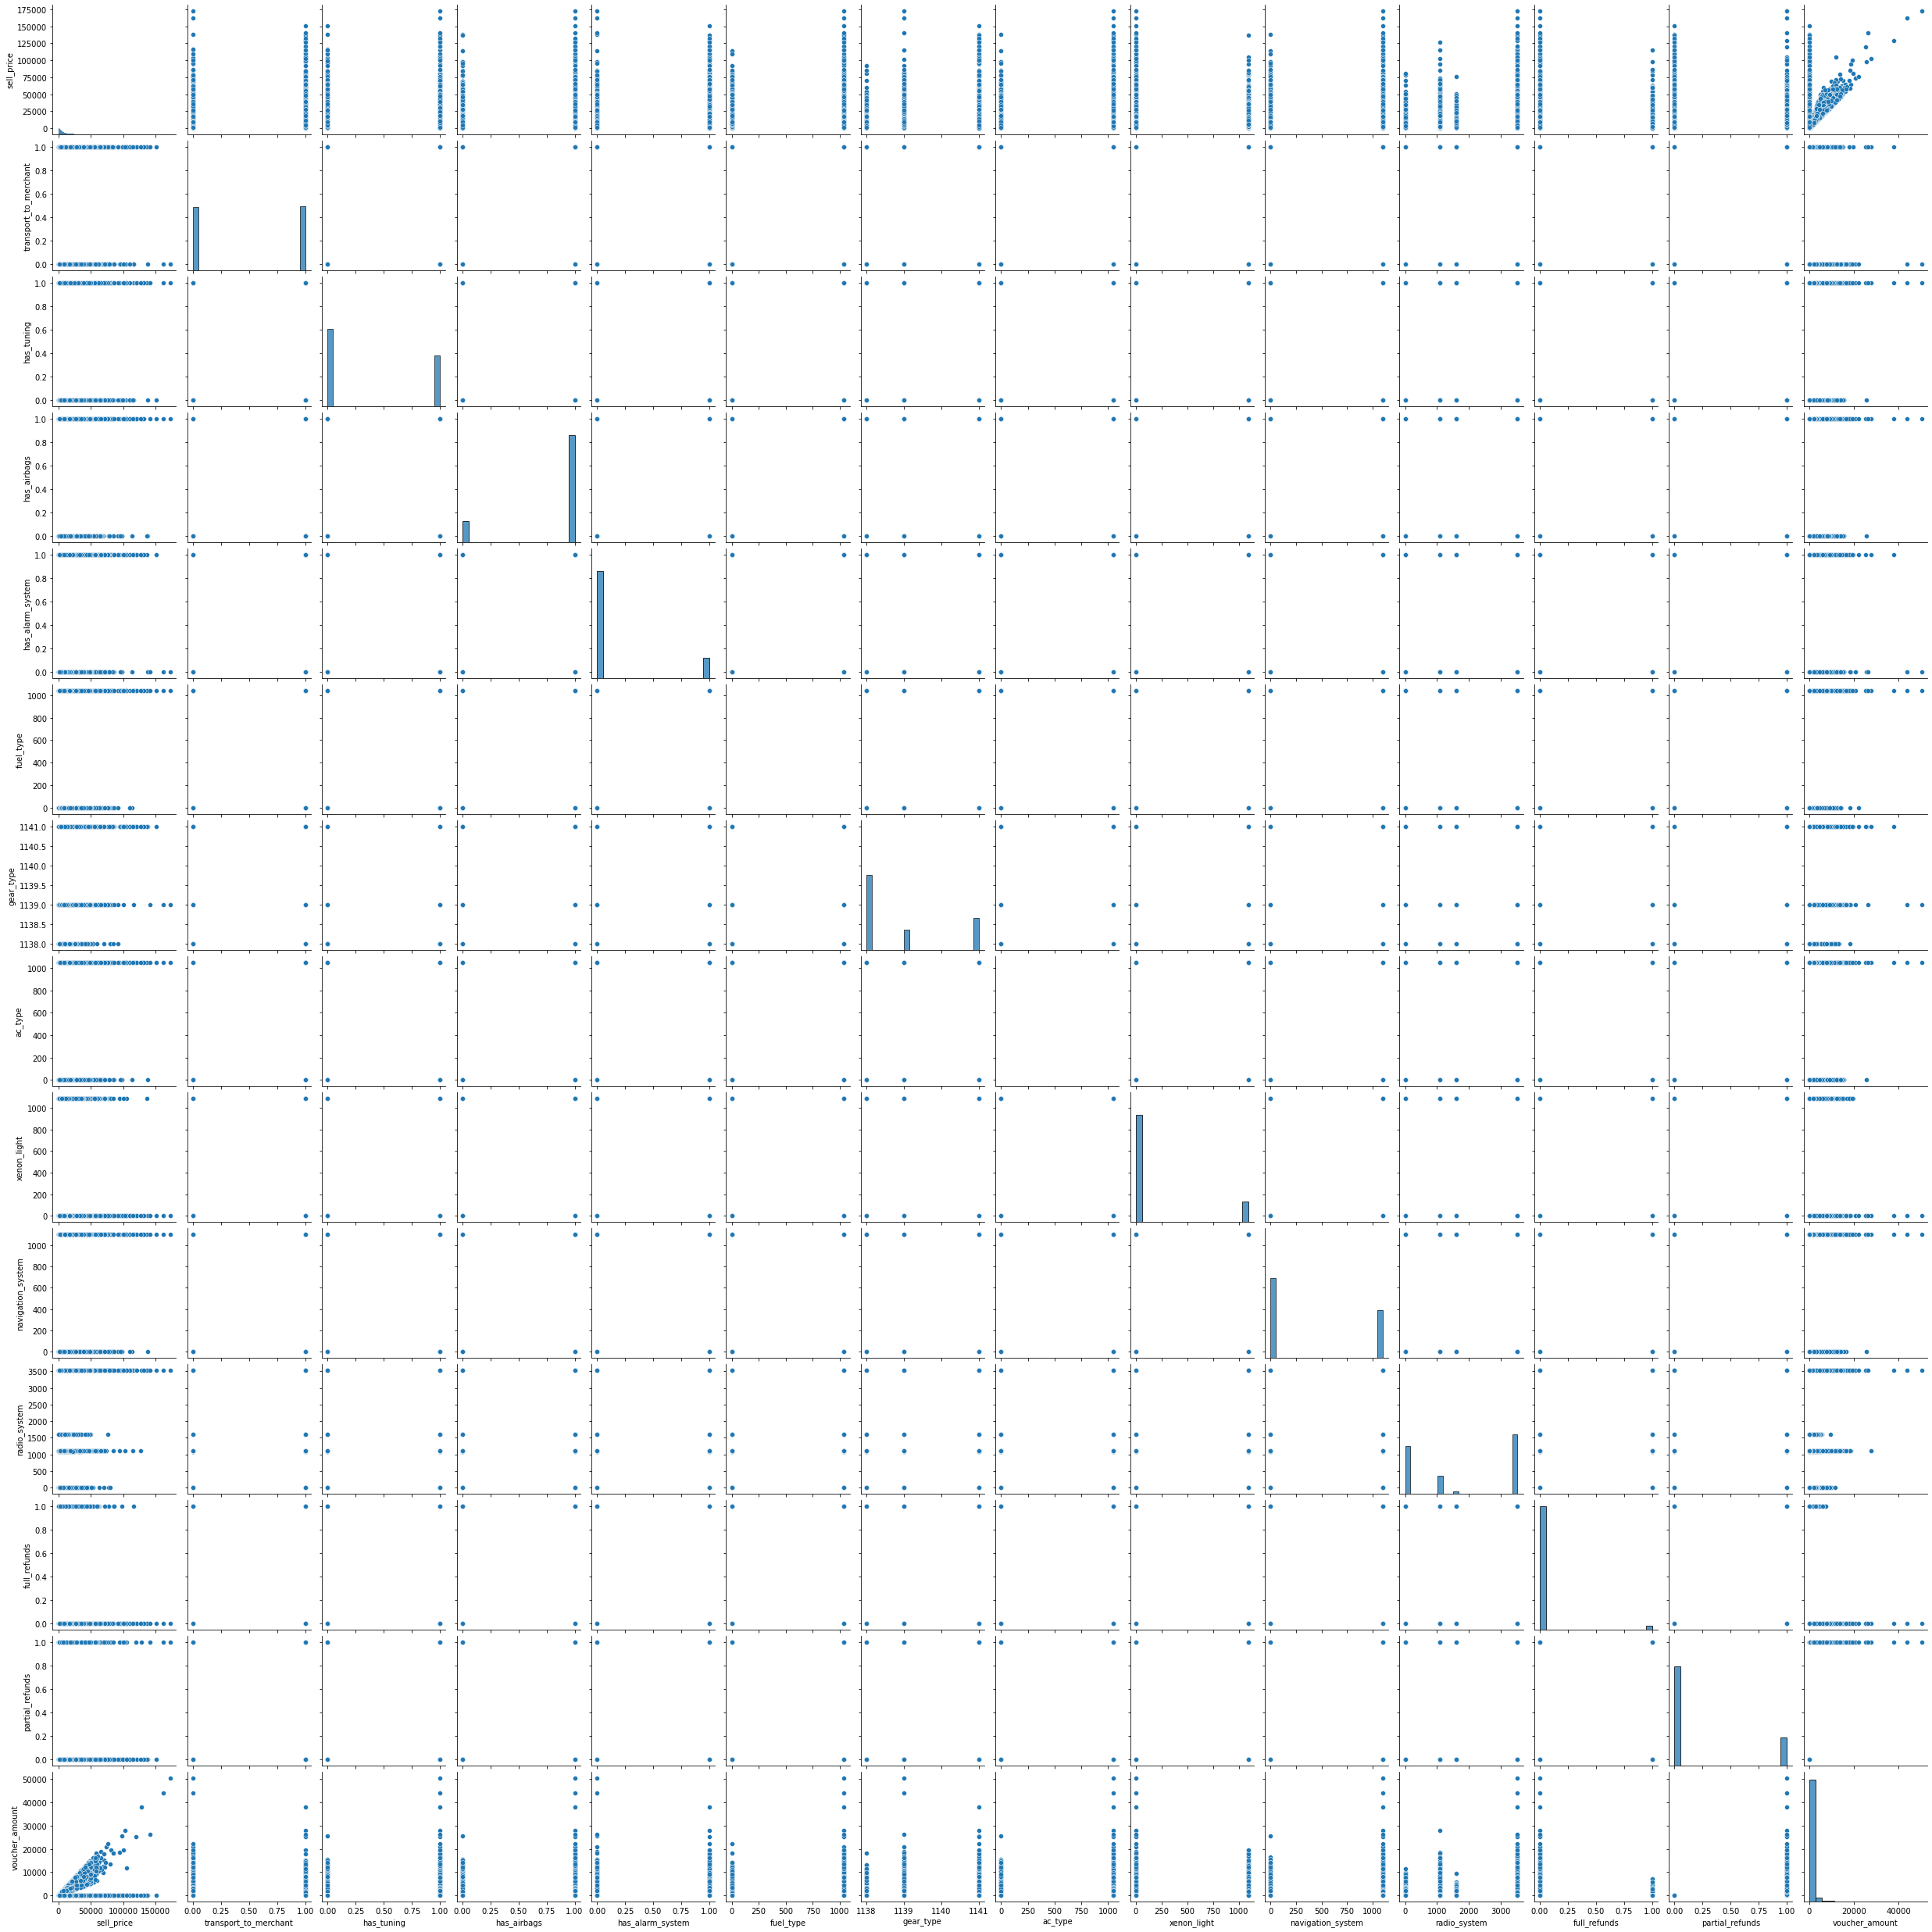

In [21]:
sns.pairplot(df_ALL)

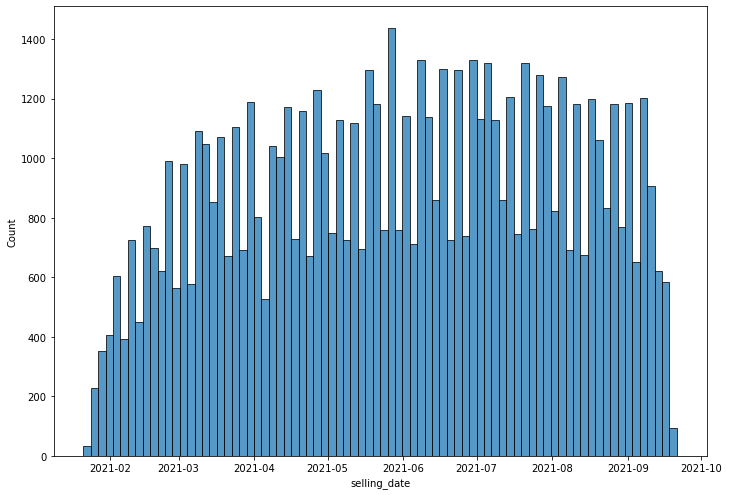

In [22]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sb.histplot( df_ALL['selling_date'],ax=ax,bins=80);

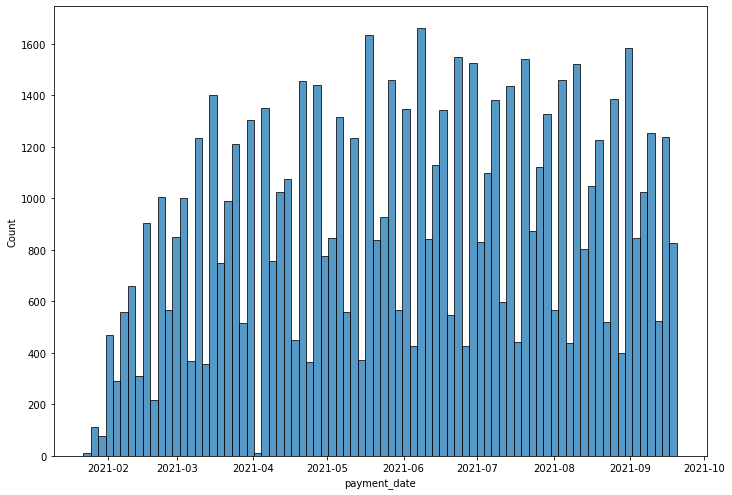

In [23]:
fig, ax = plt.subplots(figsize=a4_dims)
sb.histplot(df_ALL['payment_date'],ax=ax,bins=80);

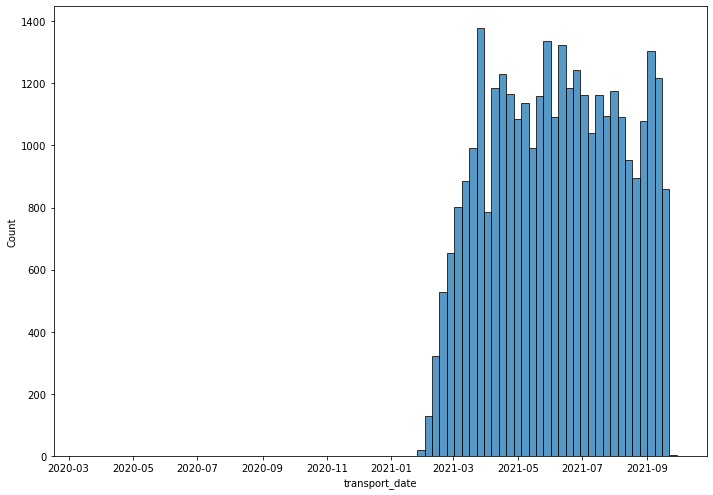

In [24]:
fig, ax = plt.subplots(figsize=a4_dims)
sb.histplot(df_ALL['transport_date'],ax=ax,bins=80);

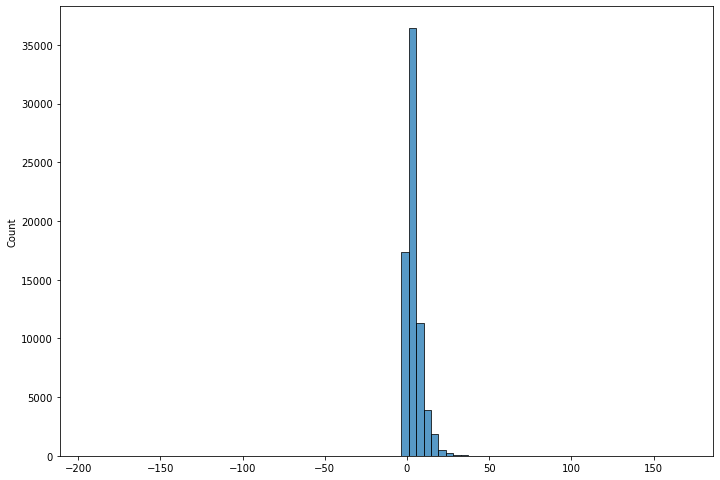

In [25]:
fig, ax = plt.subplots(figsize=a4_dims)
sb.histplot((df_ALL['payment_date']-df_ALL['selling_date']).dt.days,ax=ax,bins=80);

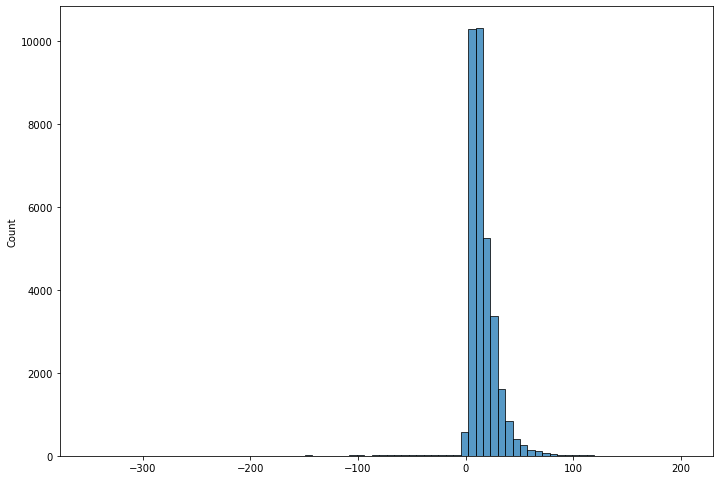

In [26]:
fig, ax = plt.subplots(figsize=a4_dims)
sb.histplot((df_ALL['transport_date']-df_ALL['selling_date']).dt.days,ax=ax,bins=80);

#### Most claims are for cars from February 2021 to September 2021. 

# Now what is the factor that most affects the claims?

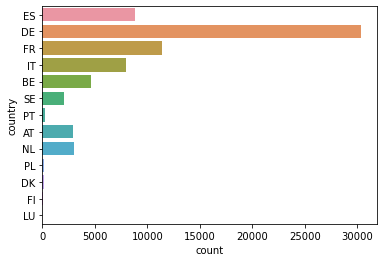

In [27]:
sb.countplot(data=df_ALL,y='country');

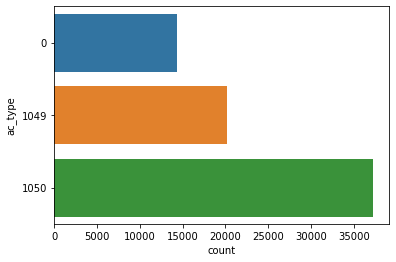

In [28]:
sb.countplot(data=df_ALL,y='ac_type');

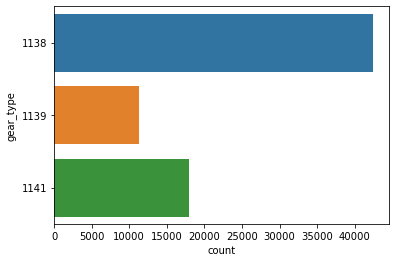

In [29]:
sb.countplot(data=df_ALL,y='gear_type');


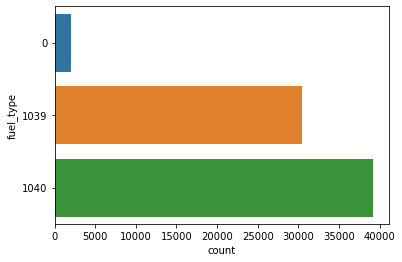

In [30]:
sb.countplot(data=df_ALL,y='fuel_type');

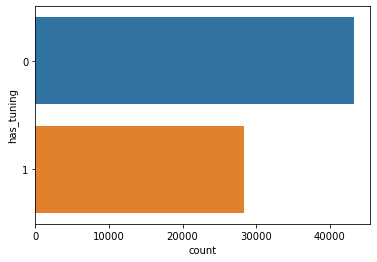

In [31]:
sb.countplot(data=df_ALL,y='has_tuning');

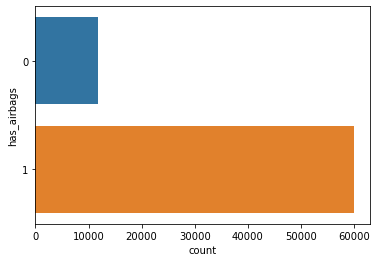

In [32]:
sb.countplot(data=df_ALL,y='has_airbags');

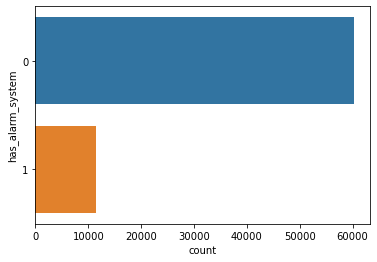

In [33]:
sb.countplot(data=df_ALL,y='has_alarm_system');

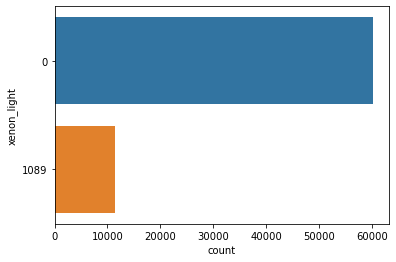

In [34]:
sb.countplot(data=df_ALL,y='xenon_light');

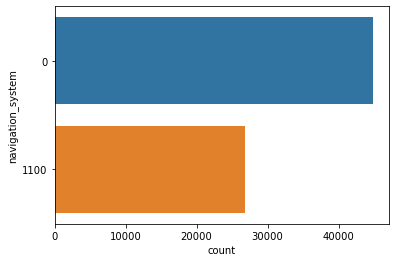

In [35]:
sb.countplot(data=df_ALL,y='navigation_system');

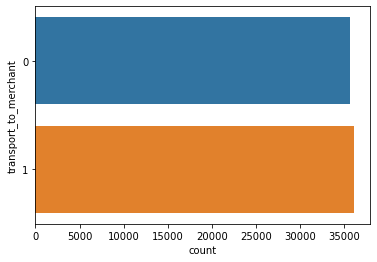

In [36]:
sb.countplot(data=df_ALL,y='transport_to_merchant');

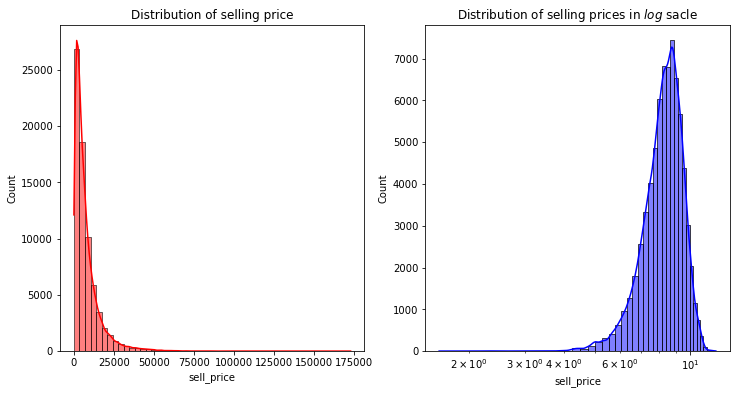

In [37]:
#let's check the distribution of selling_price and log. selling_price
f= plt.figure(figsize=(12,6))

# For left plot
ax=f.add_subplot(121)

sns.histplot(df_ALL["sell_price"], bins=50, color="red", ax=ax, kde=True)
ax.set_title("Distribution of selling price")


# For right plot
ax=f.add_subplot(122)

sns.histplot(np.log(df_ALL["sell_price"]), bins=40, color="blue", ax=ax, kde=True)
ax.set_title("Distribution of selling prices in $log$ sacle")
ax.set_xscale("log");

<AxesSubplot:xlabel='has_airbags', ylabel='sell_price'>

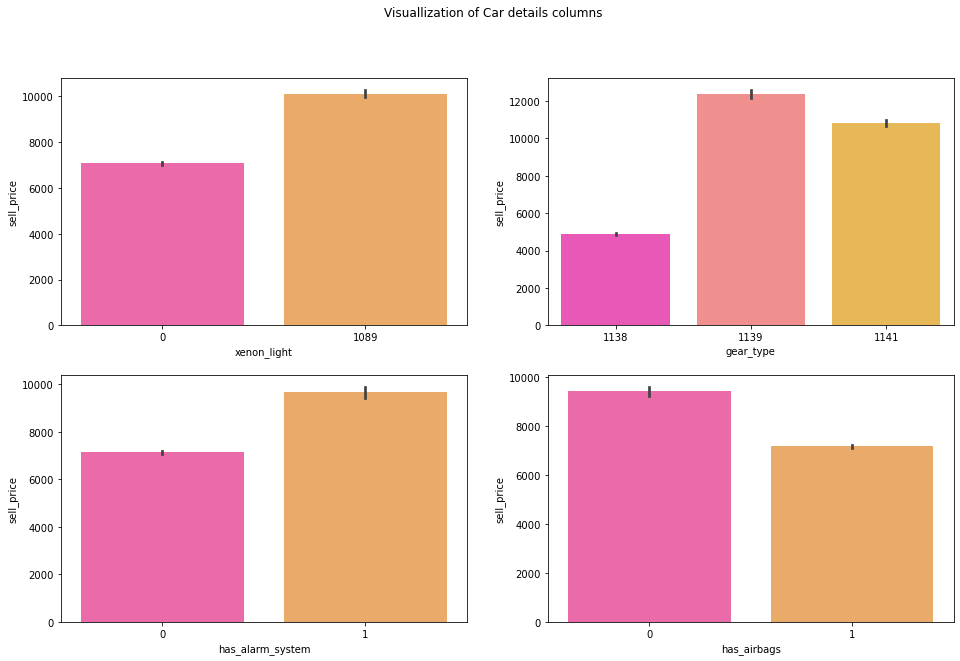

In [38]:
fig, axes = plt.subplots(2, 2, figsize = (16,10))
fig.suptitle('Visuallization of Car details columns')

sns.barplot(x = 'xenon_light', y = 'sell_price', data = df_ALL, palette='spring', ax = axes[0,0])
sns.barplot(x = 'gear_type', y = 'sell_price', data = df_ALL, palette='spring', ax = axes[0,1])
sns.barplot(x = 'has_alarm_system', y = 'sell_price', data = df_ALL, palette='spring', ax = axes[1,0])
sns.barplot(x = 'has_airbags', y = 'sell_price', data = df_ALL, palette='spring', ax = axes[1,1])

#### Cars having no xenon light has less selling price in comparison to xenon light.
#### Cars with 1138 gear type has less selling price compared to other gear types.
#### Cars without alarm system has less selling price.
#### Cars without airbas has more selling price compared to having air bags.

### It appears that most claims come from Germany, from cars without Xenon Lights and/or without alarm system and/or has airbags and/or has geartype 1138.
### It is to be noticed also that for higher price cars, the problems and claims are much less.

In [39]:
df_ALL.corr()

,sell_price,transport_to_merchant,has_tuning,has_airbags,has_alarm_system,fuel_type,gear_type,ac_type,xenon_light,navigation_system,radio_system,full_refunds,partial_refunds,voucher_amount
sell_price,1.000000,-0.125351,0.022486,-0.096847,0.107330,-0.192693,0.296767,-0.062729,0.129419,0.296305,0.181041,0.033886,0.089911,0.437715
transport_to_merchant,-0.125351,1.000000,-0.028945,-0.002695,0.010918,0.046226,-0.037711,-0.009877,-0.013172,-0.076476,-0.002952,-0.000441,-0.052312,-0.068361
has_tuning,0.022486,-0.028945,1.000000,0.307936,0.074376,-0.005748,-0.191213,0.283418,0.102408,0.273885,-0.134259,0.140372,0.429384,0.237160
has_airbags,-0.096847,-0.002695,0.307936,1.000000,0.186631,0.029611,-0.628324,0.804340,0.189151,0.127917,-0.410894,-0.040767,-0.094131,-0.091146
has_alarm_system,0.107330,0.010918,0.074376,0.186631,1.000000,0.007278,-0.063955,0.156573,0.181664,0.102737,0.070174,-0.002397,0.000203,0.042818
fuel_type,-0.192693,0.046226,-0.005748,0.029611,0.007278,1.000000,-0.079196,0.051455,0.043388,-0.039621,-0.070838,-0.011062,-0.017075,-0.060799
gear_type,0.296767,-0.037711,-0.191213,-0.628324,-0.063955,-0.079196,1.000000,-0.532315,0.036709,0.092548,0.375609,0.046035,0.111590,0.160540
ac_type,-0.062729,-0.009877,0.283418,0.804340,0.156573,0.051455,-0.532315,1.000000,0.206035,0.159159,-0.401415,-0.032479,-0.066501,-0.069729
xenon_light,0.129419,-0.013172,0.102408,0.189151,0.181664,0.043388,0.036709,0.206035,1.000000,0.272228,0.030963,0.008850,0.033824,0.056801
navigation_system,0.296305,-0.076476,0.273885,0.127917,0.102737,-0.039621,0.092548,0.159159,0.272228,1.000000,0.177856,0.117556,0.341410,0.256740


<AxesSubplot:>

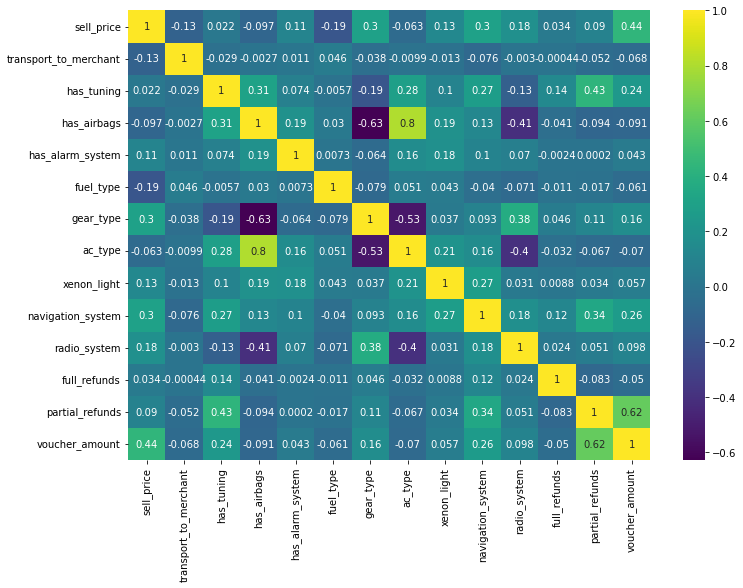

In [40]:
fig, ax = plt.subplots(figsize=a4_dims)
sb.heatmap(df_ALL.corr(),cmap='viridis',ax=ax,annot=True)

#### Voucher amount is relevant to the price of the car. More partial refunds happen in cars with accessories like navigation system.

In [41]:
df_ALL['voucher_amount'][df_ALL['partial_refunds']==1].sum()

30831122.819621168

In [42]:
df_ALL['voucher_amount'][df_ALL['full_refunds']==1].sum()

175989.37339240377

#### Partial refund voucher amount is 300 times more than full refund voucher amount.

In [43]:
df_ALL.head()

,car_id_sales,country,merchant_id,selling_date,payment_date,sell_price,transport_to_merchant,transport_date,has_tuning,has_airbags,...,gear_type,ac_type,xenon_light,navigation_system,radio_system,claim_number,full_refunds,partial_refunds,voucher_amount,claim_status
0,-873191947,ES,0,2021-04-29,2021-05-14,1098,1,2021-05-31,1,1,...,1138,1050,0,0,3534.0,NaN,0,0,0.0,Not in File
1,1021776636,DE,0,2021-08-06,2021-08-17,435,1,2021-08-31,0,1,...,1138,0,0,0,0.0,NaN,0,0,0.0,Not in File
2,1490192135,FR,0,2021-06-03,2021-06-08,11028,0,NaT,0,1,...,1138,1050,0,1100,3534.0,NaN,0,0,0.0,Not in File
3,-1581171421,DE,0,2021-06-07,2021-06-08,21100,1,NaT,0,1,...,1141,1050,0,1100,3534.0,NaN,0,0,0.0,Not in File
4,1417558732,DE,0,2021-08-31,2021-09-02,1943,1,2021-09-09,0,1,...,1138,1049,0,0,0.0,NaN,0,0,0.0,Not in File


In [44]:
X = df_ALL.drop(columns=['car_id_sales','country','merchant_id','selling_date','payment_date','transport_date','claim_number','claim_status','sell_price',],axis=1)

Y= df_ALL['sell_price']

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)
lin_reg_model = LinearRegression()

In [47]:
lin_reg_model.fit(X_train,Y_train)
training_data_prediction = lin_reg_model.predict(X_train)


In [48]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.38656014116683424


In [49]:
# temp here stores the numerical columns from the vehicles dataset that influence the prediction
temp=df_ALL.drop(columns=['car_id_sales','country','merchant_id','selling_date','payment_date','transport_date','claim_number','claim_status','sell_price'])

coeff_df = pd.DataFrame(lin_reg_model.coef_,temp.columns,columns=['Coefficient'])
coeff_df 

,Coefficient
transport_to_merchant,-1285.575199
has_tuning,277.287208
has_airbags,-40.233302
has_alarm_system,1577.516089
fuel_type,-6.729455
gear_type,1587.014173
ac_type,0.745987
xenon_light,0.577012
navigation_system,3.604468
radio_system,0.097525


#### Interpreting the coefficients:
#### For numerical features:

#### Holding all other features fixed, a 1 unit increase in has_tuning is associated with an increase of 277.28.
#### Holding all other features fixed, a 1 unit increase in has_airbags is associated with an decrease of 40.233.

### Let's take the predictions off our test set and see how well it did!

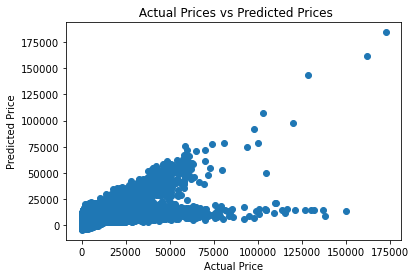

In [50]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

## Conclusion
#### Most claims were made from Germany and for cars without xenon light, alarm system, air bags and gear type 1138. And even these cars have less selling price compared to cars having those characteristics.
#### The cars with above mentioned features have more selling price and less refunds.
#### From the bussiness point view inorder to reduce claims and refunds it will be wise to keeps those cars which have all the characteristics. And exclude those cars from the list which do not have these characteristics.
